In [1]:
import os, ssl

if not os.environ.get("PYTHONHTTPSVERIFY", "") and getattr(
    ssl, "_create_unverified_context", None
):
    ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from scipy.cluster.hierarchy import dendrogram, linkage


import numpy as np
import matplotlib.pyplot as plt

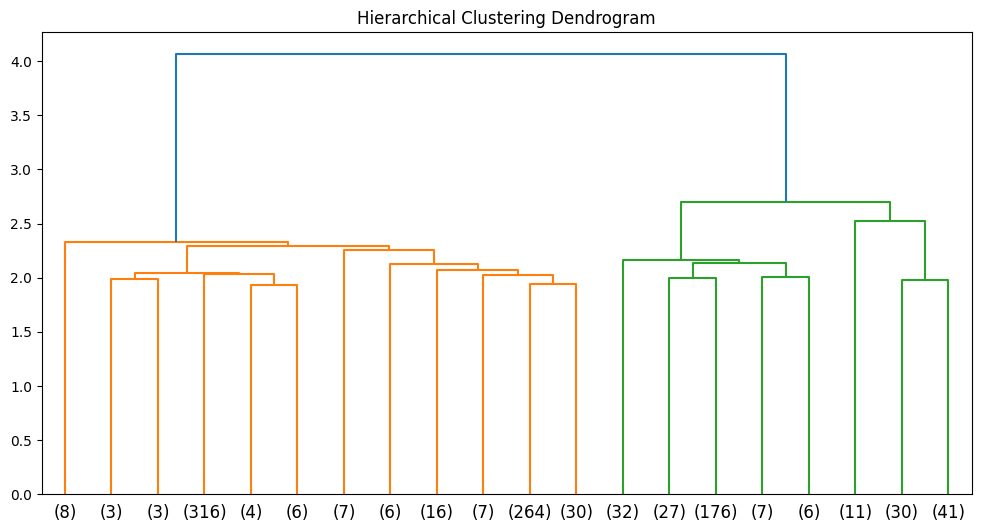

Adjusted Rand Index: 0.04818232235460613


In [5]:
# Fetch the 20 newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset="train")
data = newsgroups_data.data[:1000]
target = newsgroups_data.target[:1000]
target_names = newsgroups_data.target_names[:1000]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=20, linkage="ward")
clusters = agg_clustering.fit_predict(tfidf_matrix.toarray())

# Truncated Dendrogram
Z = linkage(tfidf_matrix.toarray(), method="ward")
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="lastp", p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

ari = adjusted_rand_score(target, clusters)
print(f"Adjusted Rand Index: {ari}")

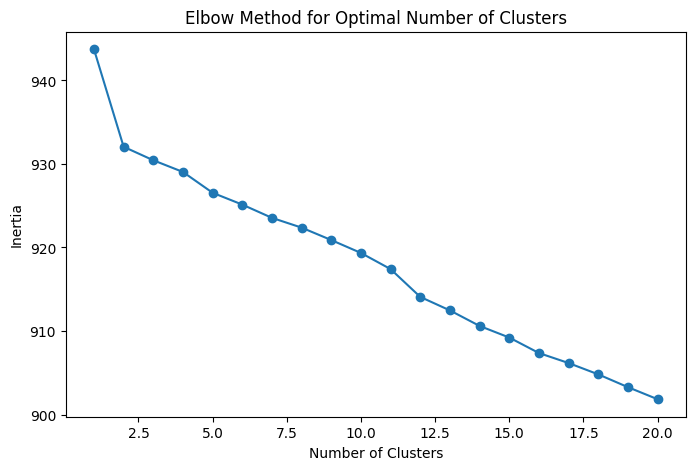

In [17]:
# K-Means Clustering
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_clusters = kmeans.fit_predict(tfidf_matrix)

# Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

In [7]:
from sklearn.metrics import f1_score

# Fetch the 20 newsgroups dataset
train_newsgroups_data = fetch_20newsgroups(
    subset="train", shuffle=True, random_state=42
)
train_data = train_newsgroups_data.data[:10_000]
train_target = train_newsgroups_data.target[:10_000]
train_target_names = train_newsgroups_data.target_names[:10_000]

test_newsgroups_data = fetch_20newsgroups(subset="test", shuffle=False)
test_data = test_newsgroups_data.data[:1000]
test_target = test_newsgroups_data.target[:1000]
test_target_names = test_newsgroups_data.target_names[:1000]


tfidf_vectorizer = TfidfVectorizer(stop_words="english")
train_tfidf_matrix = tfidf_vectorizer.fit_transform(train_data)
test_tfidf_matrix = tfidf_vectorizer.transform(test_data)


logistic_reg = LogisticRegression()
logistic_reg.fit(train_tfidf_matrix, train_target)
logistic_reg_pred = logistic_reg.predict(test_tfidf_matrix)

naive_bayes = MultinomialNB()
naive_bayes.fit(train_tfidf_matrix, train_target)
naive_bayes_pred = naive_bayes.predict(test_tfidf_matrix)

knn = KNeighborsClassifier()
knn.fit(train_tfidf_matrix, train_target)
knn_pred = knn.predict(test_tfidf_matrix)


print(f"Logreg f1_score: {f1_score(test_target, logistic_reg_pred, average='macro')}")
print(
    f"Naive bayes f1_score: {f1_score(test_target, naive_bayes_pred, average='macro')}"
)
print(f"Knn f1_score: {f1_score(test_target, knn_pred, average='macro')}")

Logreg f1_score: 0.8157998168025987
Naive bayes f1_score: 0.8075684106542912
Knn f1_score: 0.6831665949272355
